# Пример работы с прогнозным сервисом

Для примера возьмем данные "Индикатор бизнес-климата ЦБ (промышленность), пункты, Россия"

In [569]:
import pandas as pd
import numpy as np
from datetime import date
import plotly.graph_objects as go
import requests
import json

In [622]:
df = pd.read_csv(f'./raw_data/Новостной идекс ЦБ, Россия — Диаграмма.csv', sep=';')
df.columns = ['dataset', 'date', 'values']
df.head(3)

,dataset,date,values
0,62293,01.02.2004,1.283101
1,62293,01.03.2004,1.316614
2,62293,01.04.2004,1.544784


возьмем все значения кроме последних трех

In [623]:
x = list(df['date'][:-3])
y = list(df['values'][:-3])

df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y').dt.date

построим график

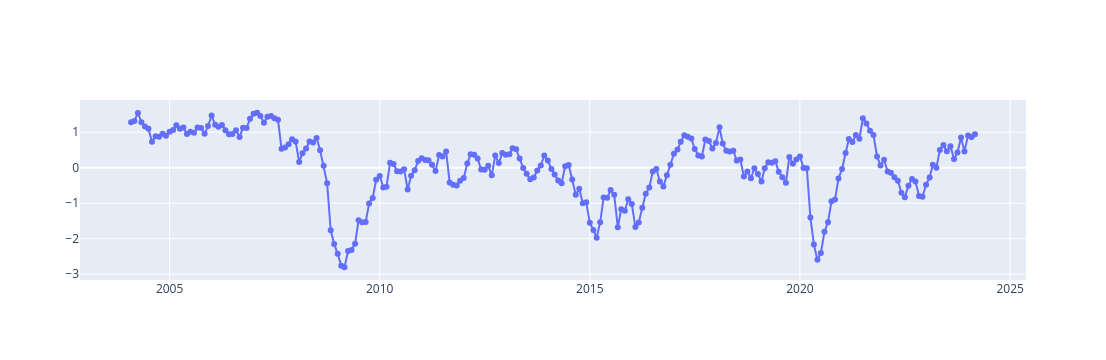

In [624]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df.date,
        y=y,
        mode='lines+markers'
    )
)

fig.show()


# Формирование запроса

In [630]:
url = 'http://localhost:5051/forecast/api/v1/base'

data = {
    "hparams": {
        "lookback": 12,
        "units": 2,
        "n_layers": 2,
        "batch_size": 5,
        "epochs": 100,
        "learning_rate": 0.0001
    },
    "target": {
        "values": y,
        "dates": x
    }
}

# Отправка запроса

In [631]:
response = requests.post(url, json=data)
response.status_code

200

Смотрим формат ответа

In [632]:
response.json()

{'previous': [0.7139173150062561,
  0.7620782852172852,
  0.7286993861198425,
  0.7413562536239624,
  0.6667520403862,
  0.6938835978507996,
  0.6818661689758301,
  0.7419289946556091,
  0.7371723651885986,
  0.6715922951698303,
  0.7549558877944946,
  0.8358073234558105,
  0.7662994861602783,
  0.7494661211967468,
  0.765010416507721,
  0.7108511924743652,
  0.6647696495056152,
  0.6679717302322388,
  0.7130872011184692,
  0.6264435052871704,
  0.7395583987236023,
  0.7359567880630493,
  0.8145368695259094,
  0.8459745645523071,
  0.851658046245575,
  0.8333585262298584,
  0.7852789163589478,
  0.8287038803100586,
  0.833175003528595,
  0.8178129196166992,
  0.8077220320701599,
  0.41674530506134033,
  0.4440813362598419,
  0.5090654492378235,
  0.5910326242446899,
  0.5558179020881653,
  0.09141548722982407,
  0.31717321276664734,
  0.42412328720092773,
  0.5556904077529907,
  0.5380592942237854,
  0.6129044890403748,
  0.38732901215553284,
  -0.01962072029709816,
  -0.54877084493637

Получаем список значений

In [634]:
forecast = response.json()

# прогноз модели на предыдущие значения
train_pred = forecast['previous']
next_pred = forecast['next']

# прогноз модели на 3 месяца вперед
# pred_y = [forecast['month_1'], forecast['month_2'], forecast['month_3']]
# pred_y

Наносим на график

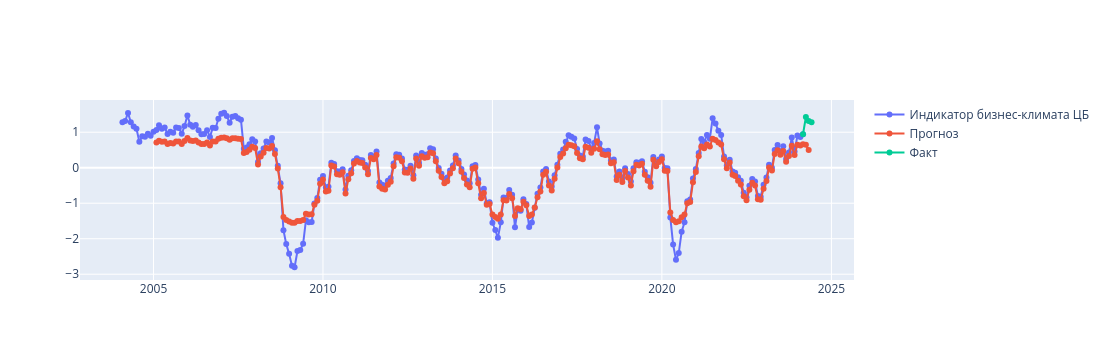

In [635]:

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=pd.to_datetime(x, format='%d.%m.%Y'),
        y=y,
        mode='lines+markers',
        name='Индикатор бизнес-климата ЦБ'
    )
)

fig.add_trace(
    go.Scatter(
        x=pd.to_datetime(df.date, format='%d.%m.%Y')[12:-1],
        y=train_pred + next_pred
        ,mode='lines+markers',
        name='Прогноз'
    )
)

fig.add_trace(
    go.Scatter(
        x=pd.to_datetime(df.date[-4:], format='%d.%m.%Y'),
        y=df['values'][-4:],
        mode='lines+markers',
        name='Факт'
    )
)

fig.show()